<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PetType             561 non-null    object 
 1   Breed               561 non-null    object 
 2   AgeMonths           505 non-null    float64
 3   Size                561 non-null    object 
 4   WeightKg            505 non-null    float64
 5   TimeInShelterDays   505 non-null    float64
 6   AdoptionLikelihood  561 non-null    int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 30.8+ KB
Dataset Info:
 None

Missing Values:
 PetType                0
Breed                  0
AgeMonths             56
Size                   0
WeightKg              56
TimeInShelterDays     56
AdoptionLikelihood     0
dtype: int64


C:\Users\prana\AppData\Local\Temp\ipykernel_19788\680866487.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


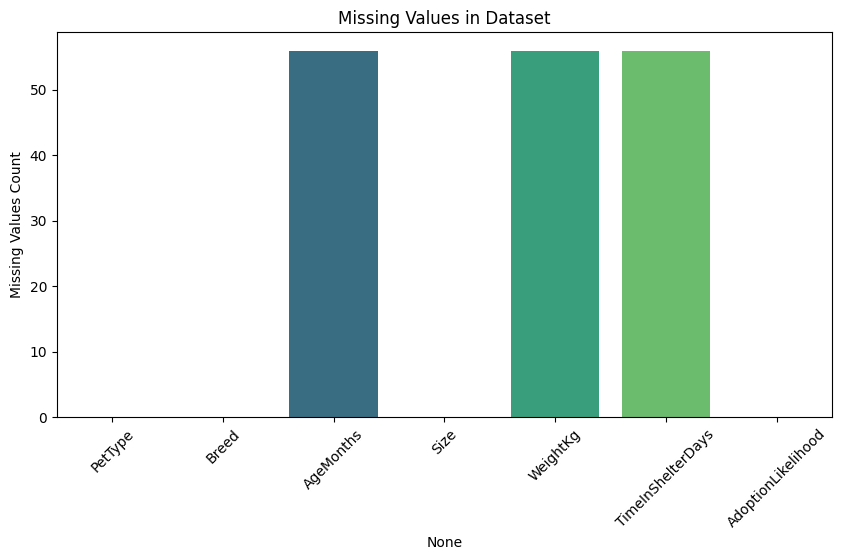

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('unclean_pet_data.csv')

# Display basic info
print("Dataset Info:\n", df.info())

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)

# Plot missing values
plt.figure(figsize=(10, 5))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.xticks(rotation=45)
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Dataset")
plt.show()


In [3]:
# Filling missing numerical values with median
df['AgeMonths'].fillna(df['AgeMonths'].median(), inplace=True)
df['WeightKg'].fillna(df['WeightKg'].median(), inplace=True)
df['TimeInShelterDays'].fillna(df['TimeInShelterDays'].median(), inplace=True)

# Verify missing values after handling
print("\nMissing Values After Handling:\n", df.isnull().sum())



Missing Values After Handling:
 PetType               0
Breed                 0
AgeMonths             0
Size                  0
WeightKg              0
TimeInShelterDays     0
AdoptionLikelihood    0
dtype: int64


C:\Users\prana\AppData\Local\Temp\ipykernel_19788\3718149913.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AgeMonths'].fillna(df['AgeMonths'].median(), inplace=True)
C:\Users\prana\AppData\Local\Temp\ipykernel_19788\3718149913.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

C:\Users\prana\AppData\Local\Temp\ipykernel_19788\4230099538.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['AdoptionLikelihood'], ax=axes[1, 1], palette="pastel")


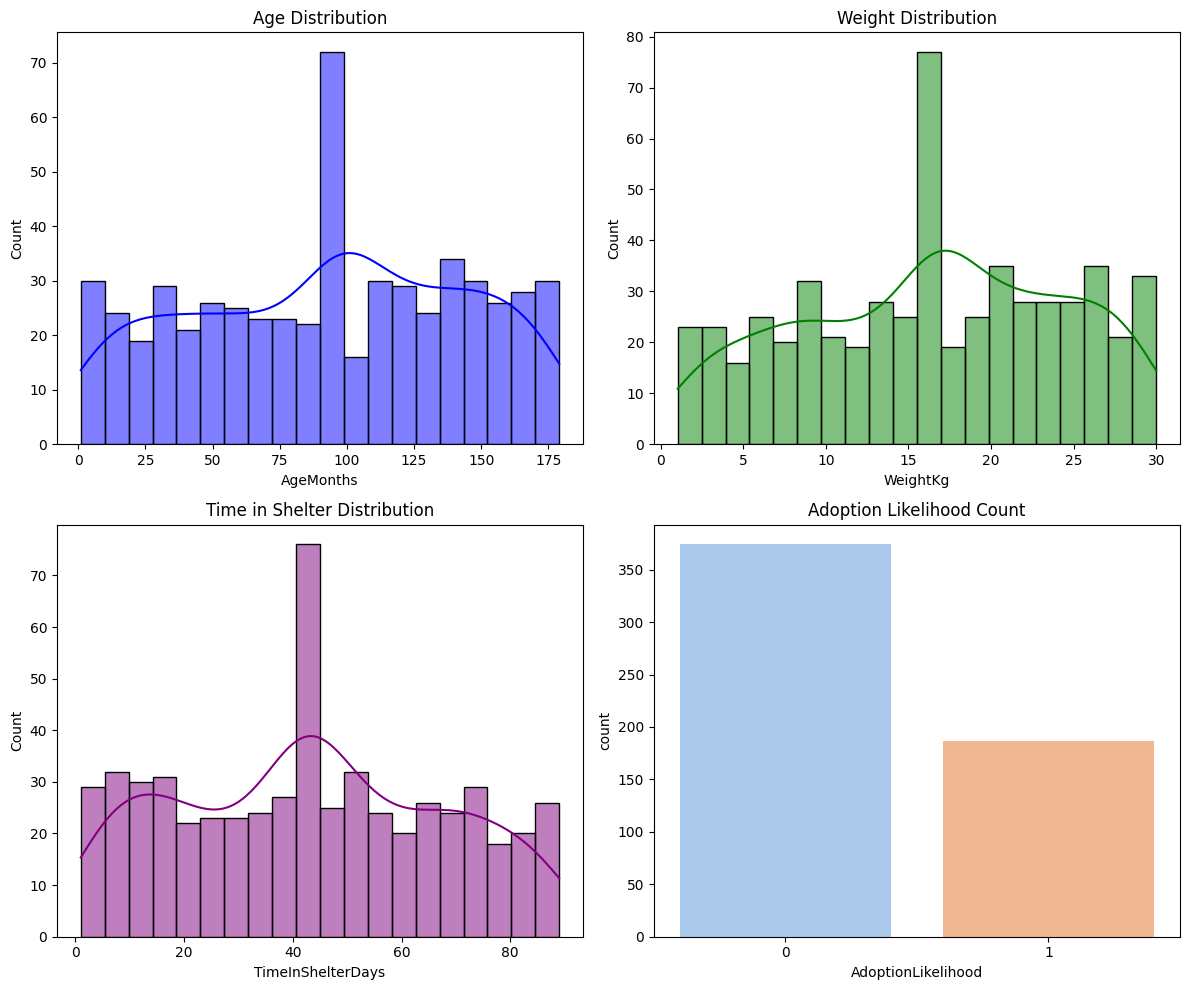

In [4]:
# Visualizing distributions of numerical variables
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['AgeMonths'], kde=True, bins=20, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Age Distribution")

sns.histplot(df['WeightKg'], kde=True, bins=20, ax=axes[0, 1], color="green")
axes[0, 1].set_title("Weight Distribution")

sns.histplot(df['TimeInShelterDays'], kde=True, bins=20, ax=axes[1, 0], color="purple")
axes[1, 0].set_title("Time in Shelter Distribution")

sns.countplot(x=df['AdoptionLikelihood'], ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title("Adoption Likelihood Count")

plt.tight_layout()
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_19788\3252771590.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionLikelihood', y='AgeMonths', data=df, ax=axes[0], palette="coolwarm")
C:\Users\prana\AppData\Local\Temp\ipykernel_19788\3252771590.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionLikelihood', y='WeightKg', data=df, ax=axes[1], palette="coolwarm")
C:\Users\prana\AppData\Local\Temp\ipykernel_19788\3252771590.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AdoptionLikelihood', y='TimeInShelterDays', d

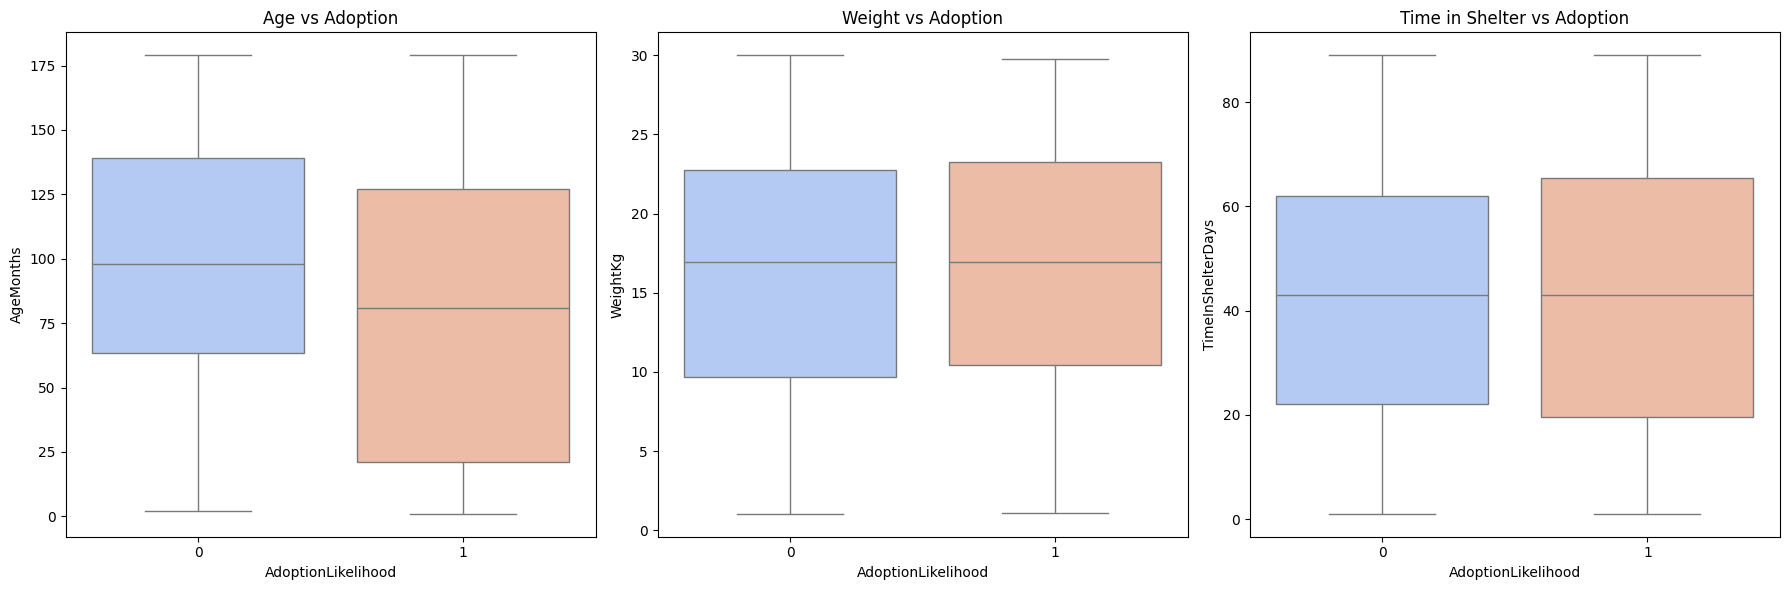

In [5]:
# Boxplots to compare numerical features against adoption decisions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.boxplot(x='AdoptionLikelihood', y='AgeMonths', data=df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Age vs Adoption")

sns.boxplot(x='AdoptionLikelihood', y='WeightKg', data=df, ax=axes[1], palette="coolwarm")
axes[1].set_title("Weight vs Adoption")

sns.boxplot(x='AdoptionLikelihood', y='TimeInShelterDays', data=df, ax=axes[2], palette="coolwarm")
axes[2].set_title("Time in Shelter vs Adoption")

plt.tight_layout()
plt.show()


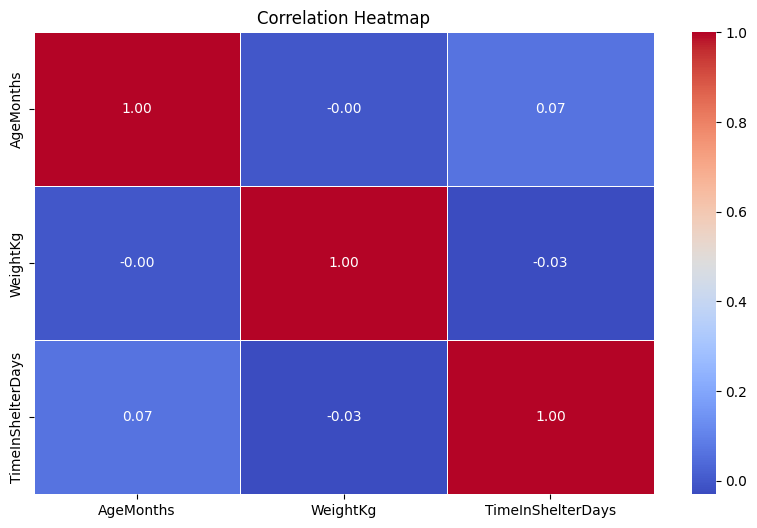

In [6]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
corr_matrix = df[['AgeMonths', 'WeightKg', 'TimeInShelterDays']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Encode categorical variables
label_encoders = {}
for col in ["PetType", "Breed", "Size", "AdoptionLikelihood"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  

# Define features (X) and target (y)
X = df.drop(columns=["AdoptionLikelihood"])
y = df["AdoptionLikelihood"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# Normalize features (MLP performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Build MLP Model
clf = MLPClassifier(hidden_layer_sizes=(6, 5),
                    activation='relu',
                    solver='adam',
                    random_state=5,
                    verbose=True,
                    max_iter=500,
                    learning_rate_init=0.01)

# Train the model
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)


Iteration 1, loss = 0.93574429
Iteration 2, loss = 0.81659751
Iteration 3, loss = 0.72911081
Iteration 4, loss = 0.67588931
Iteration 5, loss = 0.64729327
Iteration 6, loss = 0.63354864
Iteration 7, loss = 0.62658004
Iteration 8, loss = 0.62388715
Iteration 9, loss = 0.62014842
Iteration 10, loss = 0.61345628
Iteration 11, loss = 0.60748250
Iteration 12, loss = 0.60133695
Iteration 13, loss = 0.59605491
Iteration 14, loss = 0.59200731
Iteration 15, loss = 0.58814607
Iteration 16, loss = 0.58458099
Iteration 17, loss = 0.58125936
Iteration 18, loss = 0.57862634
Iteration 19, loss = 0.57578351
Iteration 20, loss = 0.57307754
Iteration 21, loss = 0.56999422
Iteration 22, loss = 0.56724458
Iteration 23, loss = 0.56427322
Iteration 24, loss = 0.56210215
Iteration 25, loss = 0.55978097
Iteration 26, loss = 0.55587065
Iteration 27, loss = 0.55190860
Iteration 28, loss = 0.54782571
Iteration 29, loss = 0.54363626
Iteration 30, loss = 0.54008207
Iteration 31, loss = 0.53651986
Iteration 32, los

In [9]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.84        70
           1       0.84      0.49      0.62        43

    accuracy                           0.77       113
   macro avg       0.79      0.72      0.73       113
weighted avg       0.78      0.77      0.75       113



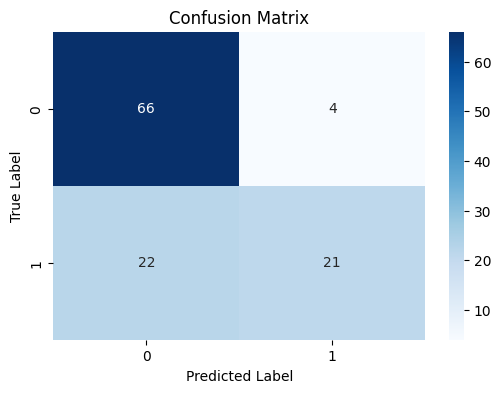

In [10]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoders["AdoptionLikelihood"].classes_, 
            yticklabels=label_encoders["AdoptionLikelihood"].classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


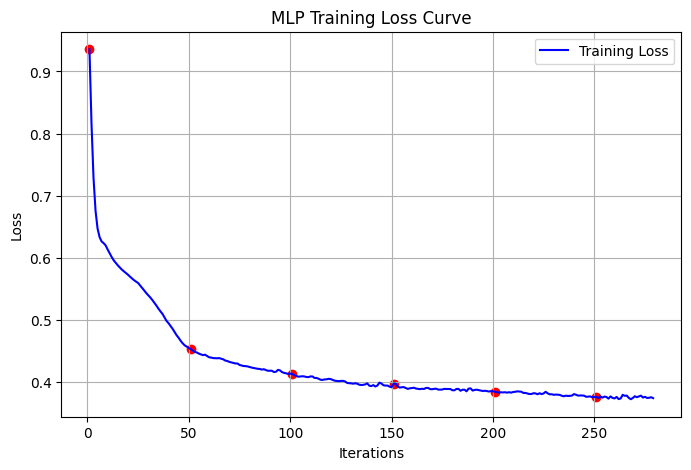

In [11]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(clf.loss_curve_) + 1), clf.loss_curve_, label="Training Loss", color='blue')

# Mark every 50th iteration
for i in range(0, len(clf.loss_curve_), 50):
    plt.scatter(i+1, clf.loss_curve_[i], color='red', marker='o')

plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("MLP Training Loss Curve")
plt.legend()
plt.grid()
plt.show()


In [12]:
'''
Initial High Loss:
At the beginning, the loss is very high (~0.95).
This is expected as the model starts with random weights.

Steep Drop in Early Iterations:
Loss rapidly decreases in the first 50 iterations, indicating that the model is learning quickly.

Gradual Convergence:
After ~100 iterations, the loss reduction slows down.
This suggests the model is fine-tuning its parameters.

Final Stability (~300 Iterations):
The curve flattens, meaning the model has reached an optimal or near-optimal state.
No significant decrease after ~250 iterations implies diminishing returns in further training.'''

'\nInitial High Loss:\nAt the beginning, the loss is very high (~0.95).\nThis is expected as the model starts with random weights.\n\nSteep Drop in Early Iterations:\nLoss rapidly decreases in the first 50 iterations, indicating that the model is learning quickly.\n\nGradual Convergence:\nAfter ~100 iterations, the loss reduction slows down.\nThis suggests the model is fine-tuning its parameters.\n\nFinal Stability (~300 Iterations):\nThe curve flattens, meaning the model has reached an optimal or near-optimal state.\nNo significant decrease after ~250 iterations implies diminishing returns in further training.'